
--------------------
Trip Summary:
--------------------
Experiment Name: AVG001_gps_tri_walk_1
Type of trip: GPS
Start time (UTC): 2024-10-24 18:28:32.723 UTC-04:00
Start time (Unix): 1729808912
Duration: 234 seconds
Number of frames: 234
Total planar distance traveled: 307.12 meters
Total curved distance traveled: 323.09 meters

--------------------
Trip Summary:
--------------------
Experiment Name: AVG001_gps_circle_walk_1
Type of trip: GPS
Start time (UTC): 2024-10-24 18:21:26.098 UTC-04:00
Start time (Unix): 1729808486
Duration: 354 seconds
Number of frames: 354
Total planar distance traveled: 448.88 meters
Total curved distance traveled: 473.40 meters
<bound method TripBase.get_raw_frame of <avgagliardo.code.trip.GpsTrip object at 0x000002327FB547C0>>
<bound method TripBase.get_raw_frame_meta of <avgagliardo.code.trip.GpsTrip object at 0x000002327FB547C0>>
       Time (s)  Latitude (°)  Longitude (°)  Altitude (m)  Altitude WGS84 (m)
0      1.186602     43.001646     -78.791056 

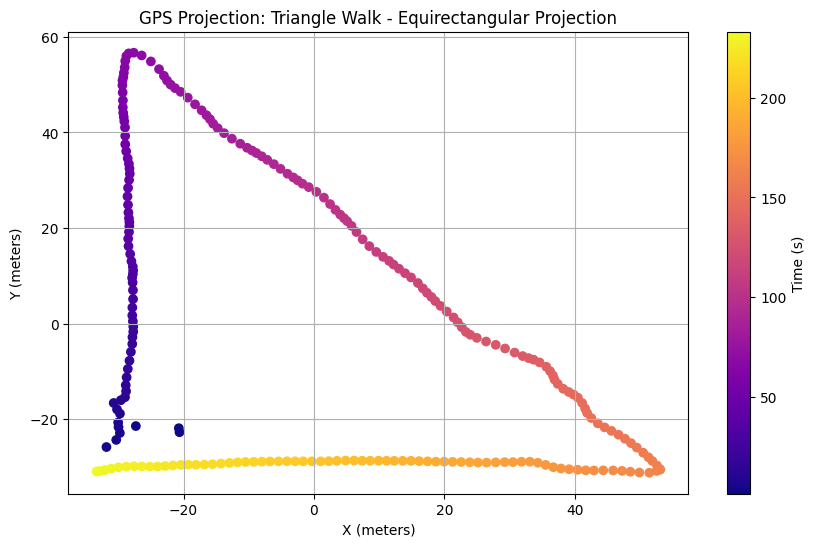

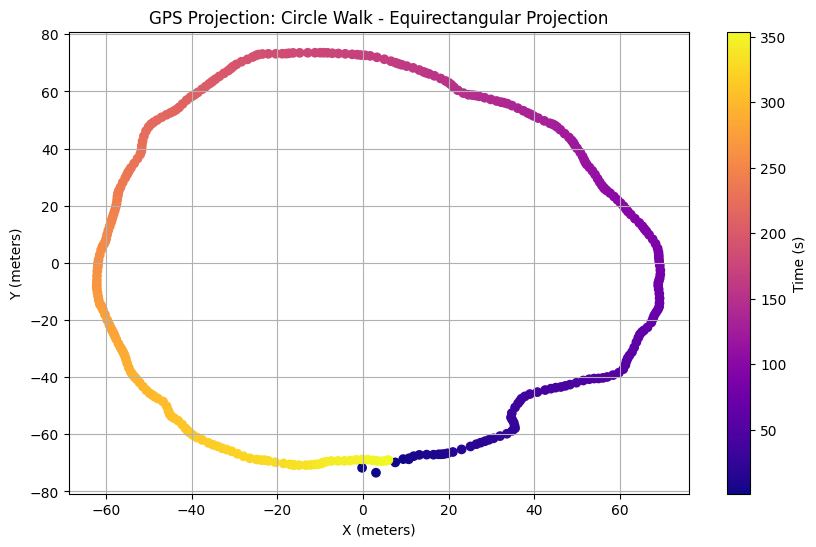

In [6]:
# GPS TRIP EXAMPLE

# import the modules
from avgagliardo.code import utils
from avgagliardo.code  import trip

import importlib
importlib.reload(utils)

# Get ahold of the GpsTrip class object
GpsTrip = trip.GpsTrip

# Get the GPS plotting method to plot the trip's path
gps_plot = utils.plot_gpstrip_segments_with_color # already projects, improperly labelled
gps_projection = utils.plot_gps_2d_projection

# Create a GPS trip by passing in the name of the experiment. This 
# must be the same as the directory name in which the 'Raw Data.csv' 
# file resides. 
gps_trip_tri = GpsTrip("AVG001_gps_tri_walk_1")
gps_trip_cir = GpsTrip("AVG001_gps_circle_walk_1")

# Inspect some data
print(gps_trip_tri.get_raw_frame)
print(gps_trip_tri.get_raw_frame_meta)
print(gps_trip_tri.data)
print(gps_trip_tri.segments)

# Report on the trip's summary
print(gps_trip_tri.report_trip_summary())

# set a save path (if you want to save the plot)
save_path = "avgagliardo/data/img/"

# plot the trip using a gps plotter, save it, and use the given title
# gps_plot(gps_trip_tri, save_path = save_path, title="GPS Trip: Triangle Walk - Displacement in Meters (m)")
# gps_plot(gps_trip_cir, save_path = save_path, title="GPS Trip: Circle Walk - Displacement in Meters (m)")
gps_projection(gps_trip_tri,save_path = save_path, title="GPS Projection: Triangle Walk - Equirectangular Projection")
gps_projection(gps_trip_cir, save_path = save_path, title="GPS Projection: Circle Walk - Equirectangular Projection")


<bound method TripBase.get_raw_frame of <avgagliardo.code.trip.AccelTrip object at 0x000001E704389A60>>
<bound method TripBase.get_raw_frame_meta of <avgagliardo.code.trip.AccelTrip object at 0x000001E704389A60>>
           time   accel_x   accel_y   accel_z  accel_absolute
0      0.052050  0.000000  0.000000  0.000000        0.000000
1      0.056799 -0.004799 -0.007201  0.005985        0.010521
2      0.061547  0.006325  0.001541  0.002396        0.006936
3      0.066296 -0.009659  0.017289 -0.001793        0.019885
4      0.071045 -0.013490 -0.001520  0.002396        0.013785
...         ...       ...       ...       ...             ...
6043  28.747989  0.044962  0.047661 -0.096333        0.116504
6044  28.752738  0.011331 -0.016883 -0.014810        0.025154
6045  28.757486 -0.031516 -0.023940  0.042295        0.057924
6046  28.762235 -0.024149 -0.014204 -0.024534        0.037241
6047  28.766984 -0.016843  0.007264  0.037398        0.041654

[6048 rows x 5 columns]
        start_t   

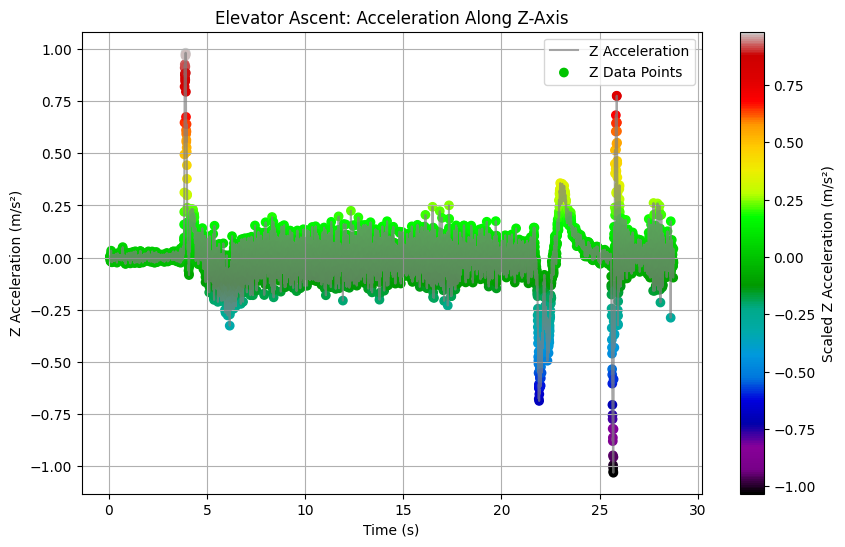

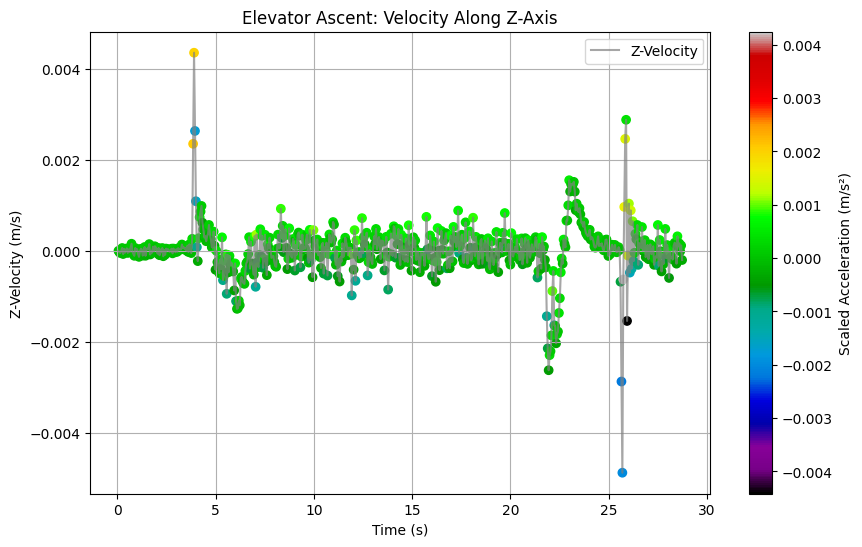

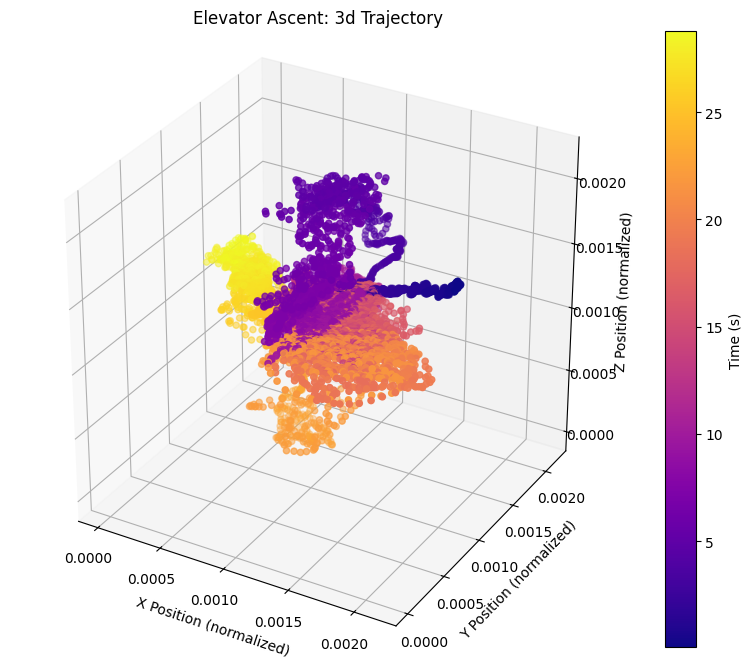

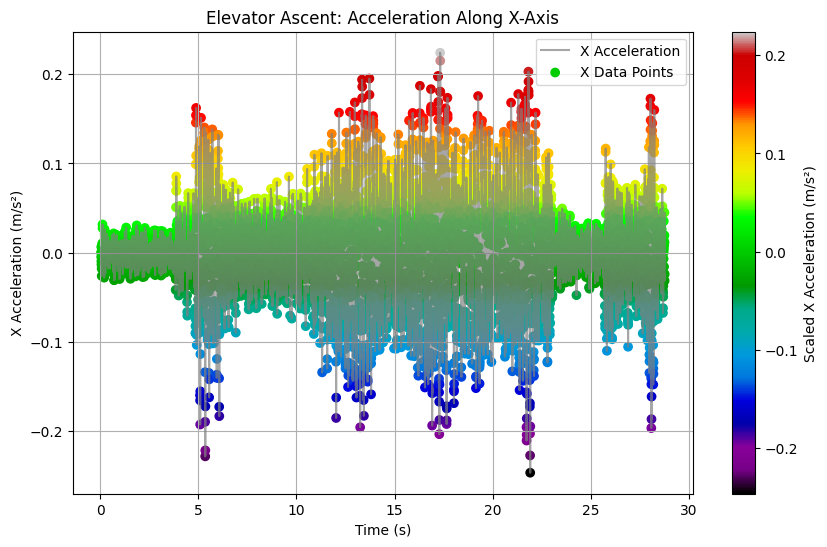

Plotted only the x-component of acceleration


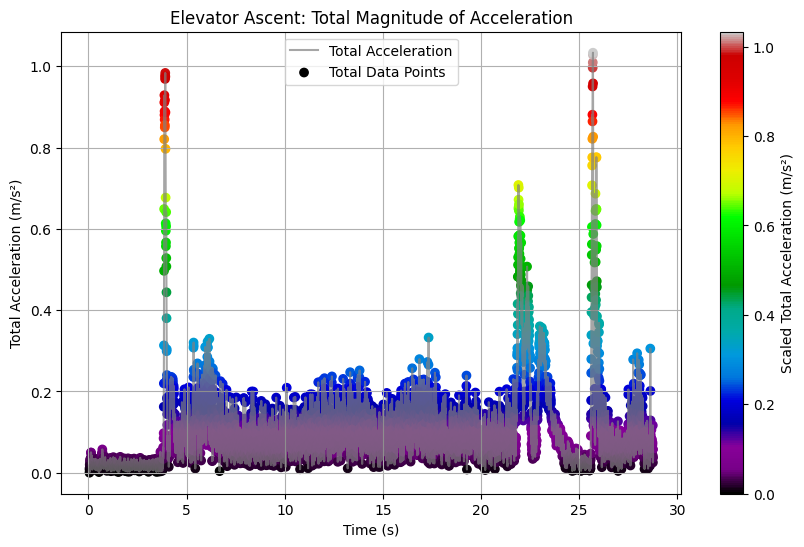

Plotted only the total magnitude of acceleration


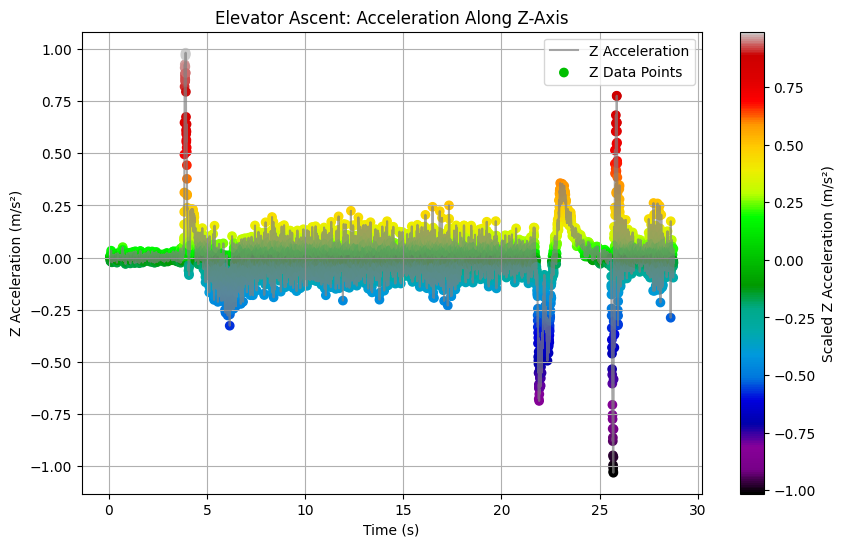

Plotted using compression factor of 2


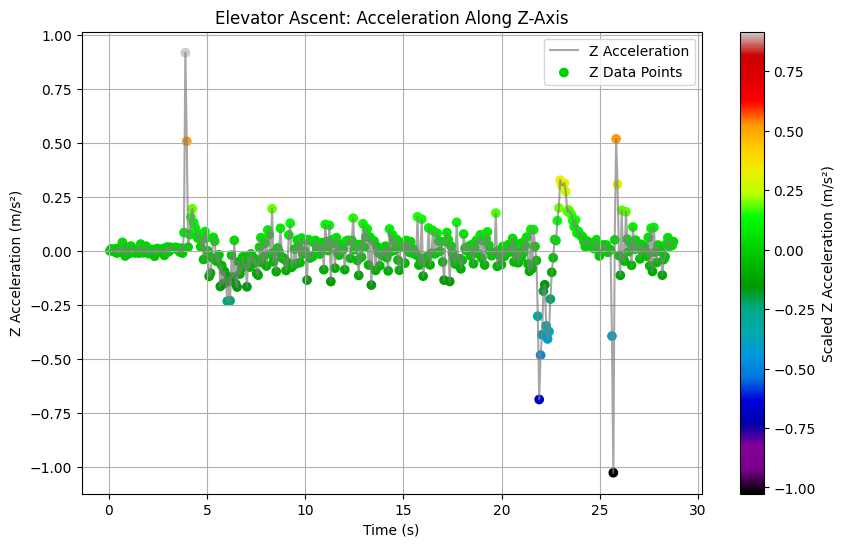

Plotted only every 5th data point


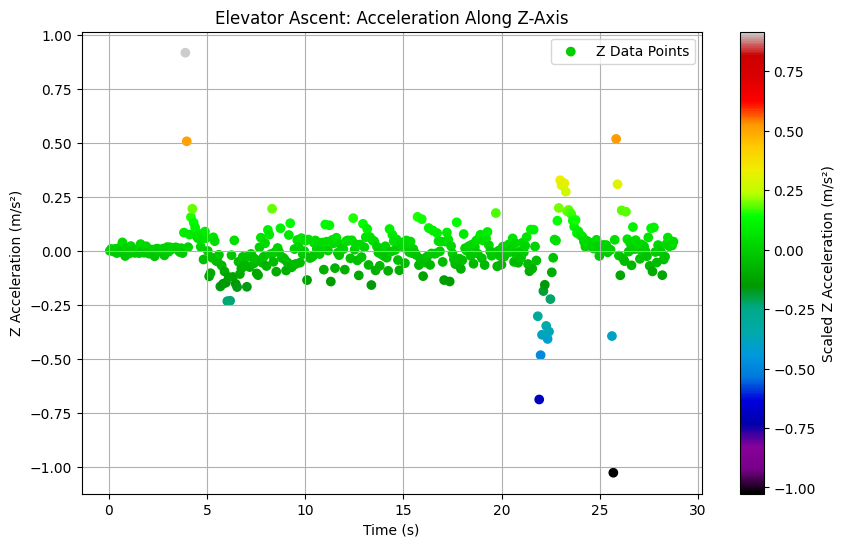

Plotted without connecting lines


In [35]:
# ACCEL TRIP EXAMPLE
# import the modules
from avgagliardo.code import utils
from avgagliardo.code import trip

import importlib
importlib.reload(utils)

# Get ahold of the GpsTrip class object
AccelTrip = trip.AccelTrip

# Get some plotting methods from the utils module
acceleration_plot = utils.plot_acceltrip_acceleration_with_color  # acceleration
velocity_plot = utils.plot_acceltrip_velocity_with_color          # velocity
trajectory_plot = utils.plot_3d_trajectory                        # 3d trajectory

# Create two trips, 1 for each way in an elevator ride
trip_up = AccelTrip("AVG001_accel_elevator_up_1")
trip_dn = AccelTrip("AVG001_accel_elevator_down_1")

# Inspect some data members
print(trip_up.get_raw_frame)
print(trip_up.get_raw_frame_meta)
print(trip_up.data)
print(trip_up.segments)

# Report on the trip summary
print(trip_up.report_trip_summary())

# set a save path (if you want to save the plot)
save_path = "avgagliardo/data/img/"

# Create some plots using our ascending trip data
acceleration_plot(trip_up, component='z', save_path = save_path, title="Elevator Ascent: Acceleration Along Z-Axis")
velocity_plot(trip_up, component='z', save_path = save_path, title="Elevator Ascent: Velocity Along Z-Axis")
trajectory_plot(trip_up, save_path = save_path, title="Elevator Ascent: 3d Trajectory")

# ADDITIONAL FEATURES
# You can select a specific component 
acceleration_plot(trip_up, component='x', title="Elevator Ascent: Acceleration Along X-Axis")
print("Plotted only the x-component of acceleration")

# Or use the total magnitude
acceleration_plot(trip_up, component='total', title="Elevator Ascent: Total Magnitude of Acceleration")
print("Plotted only the total magnitude of acceleration")

# You can use a compression factor while plotting
acceleration_plot(trip_up, component='z', compression_factor=2, title="Elevator Ascent: Acceleration Along Z-Axis")
print("Plotted using compression factor of 2")
      
# you can optionally skip data points
acceleration_plot(trip_up, component='z', step=15, title="Elevator Ascent: Acceleration Along Z-Axis")
print("Plotted only every 5th data point")

# you can toggle the connecting lines
acceleration_plot(trip_up, component='z', connect_points=False, step=15, title="Elevator Ascent: Acceleration Along Z-Axis")
print("Plotted without connecting lines")




<bound method TripBase.get_raw_frame of <avgagliardo.code.trip.AccelTrip object at 0x000001E7005737C0>>
<bound method TripBase.get_raw_frame_meta of <avgagliardo.code.trip.AccelTrip object at 0x000001E7005737C0>>
           time   accel_x   accel_y   accel_z  accel_absolute
0      0.052050  0.000000  0.000000  0.000000        0.000000
1      0.056799 -0.004799 -0.007201  0.005985        0.010521
2      0.061547  0.006325  0.001541  0.002396        0.006936
3      0.066296 -0.009659  0.017289 -0.001793        0.019885
4      0.071045 -0.013490 -0.001520  0.002396        0.013785
...         ...       ...       ...       ...             ...
6043  28.747989  0.044962  0.047661 -0.096333        0.116504
6044  28.752738  0.011331 -0.016883 -0.014810        0.025154
6045  28.757486 -0.031516 -0.023940  0.042295        0.057924
6046  28.762235 -0.024149 -0.014204 -0.024534        0.037241
6047  28.766984 -0.016843  0.007264  0.037398        0.041654

[6048 rows x 5 columns]
        start_t   

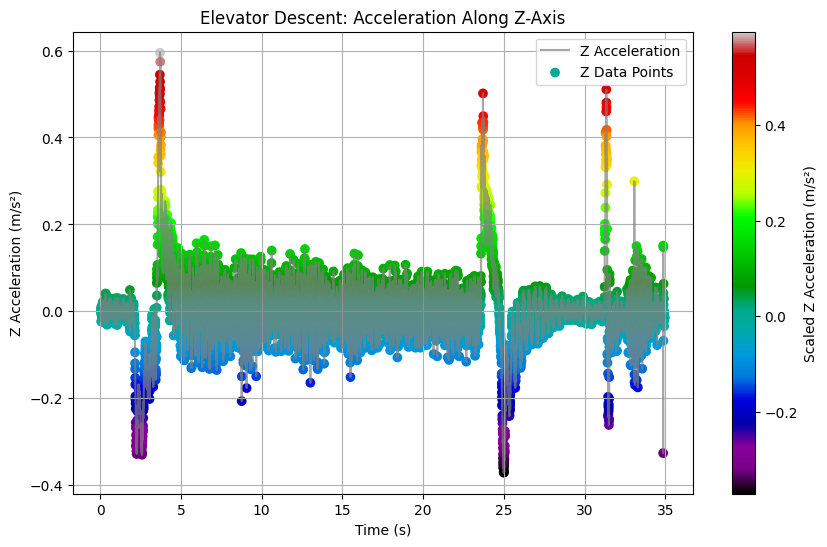

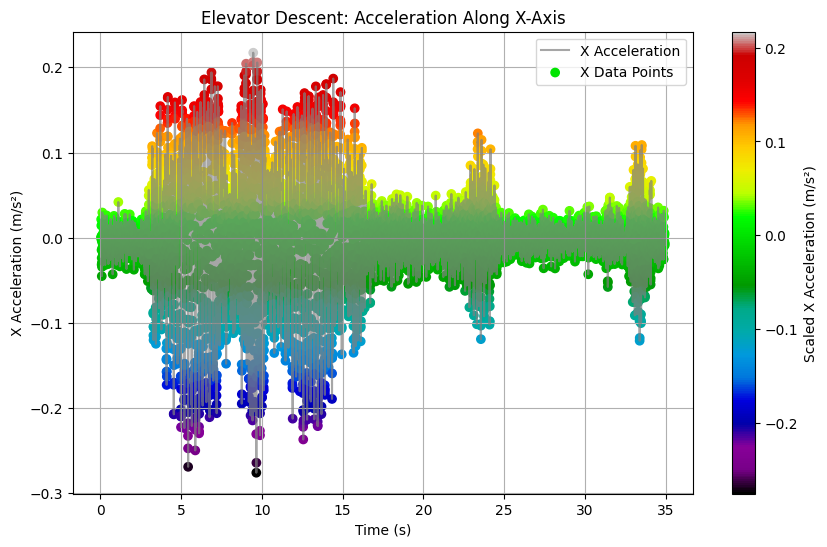

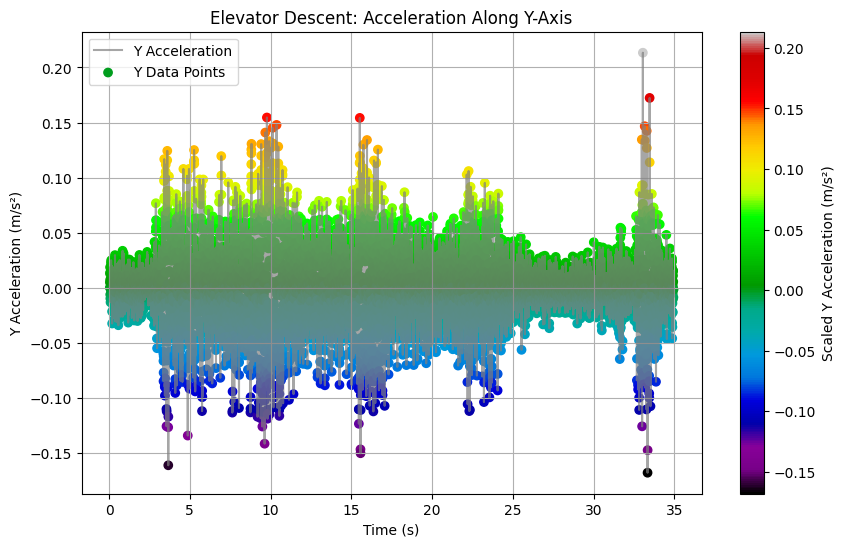

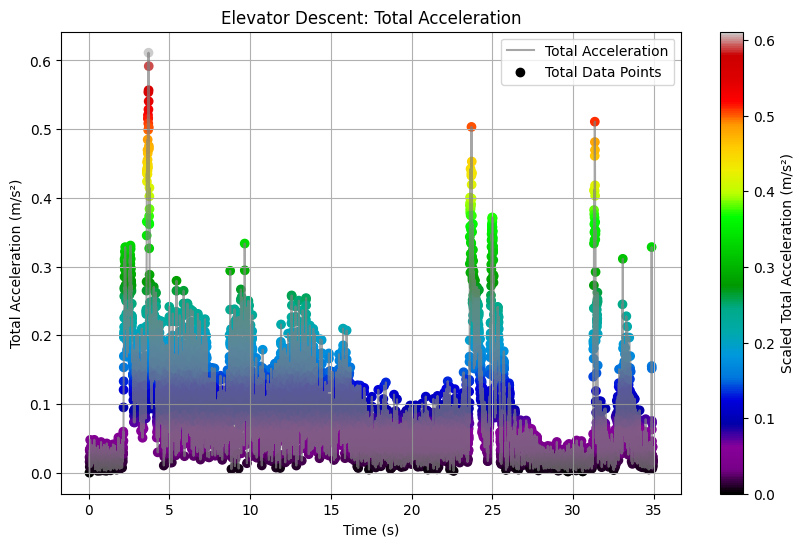

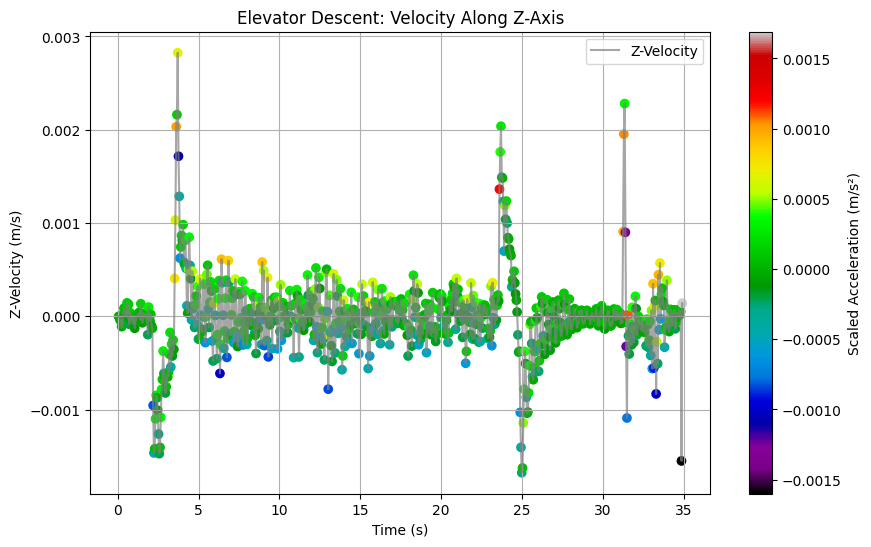

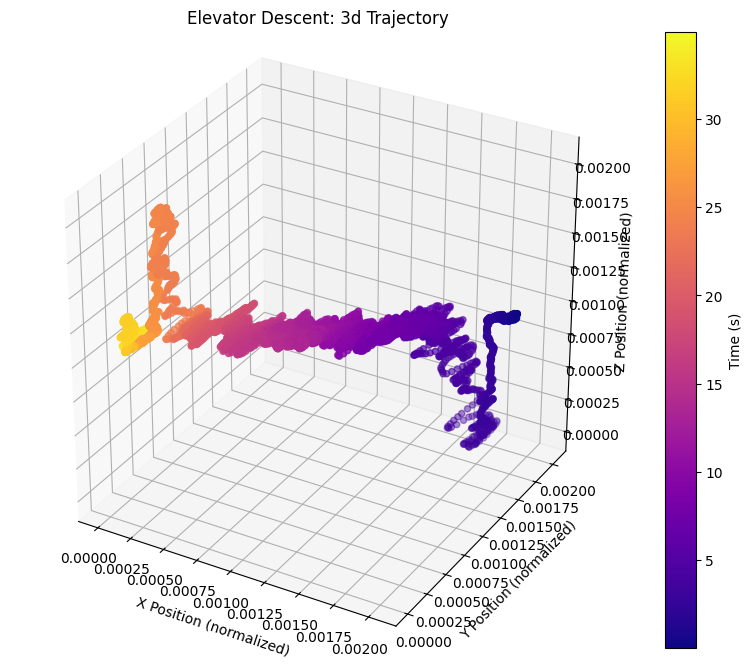

In [36]:
# import the modules
from avgagliardo.code import utils
from avgagliardo.code import trip

import importlib
importlib.reload(utils)

# Get ahold of the GpsTrip class object
AccelTrip = trip.AccelTrip

# Get some plotting methods from the utils module
acceleration_plot = utils.plot_acceltrip_acceleration_with_color  # acceleration
velocity_plot = utils.plot_acceltrip_velocity_with_color          # velocity
trajectory_plot = utils.plot_3d_trajectory                        # 3d trajectory

# Create two trips, 1 for each way in an elevator ride
trip_up = AccelTrip("AVG001_accel_elevator_up_1")
trip_dn = AccelTrip("AVG001_accel_elevator_down_1")

# Inspect some data members
print(trip_up.get_raw_frame)
print(trip_up.get_raw_frame_meta)
print(trip_up.data)
print(trip_up.segments)

# Report on the trip summary
print(trip_up.report_trip_summary())

# set a save path (if you want to save the plot)
save_path = "avgagliardo/data/img/"

# Create some plots using our ascending trip data
acceleration_plot(trip_up, component='z', save_path = save_path, title="Elevator Ascent: Acceleration Along Z-Axis")
acceleration_plot(trip_up, component='x', save_path = save_path, title="Elevator Ascent: Acceleration Along X-Axis")
acceleration_plot(trip_up, component='y', save_path = save_path, title="Elevator Ascent: Acceleration Along Y-Axis")
acceleration_plot(trip_up, component='total', save_path = save_path, title="Elevator Ascent: Total Acceleration")
velocity_plot(trip_up, component='z', save_path = save_path, title="Elevator Ascent: Velocity Along Z-Axis")
trajectory_plot(trip_up, save_path = save_path, title="Elevator Ascent: 3d Trajectory")
# Create some plots using our descending trip data
acceleration_plot(trip_dn, component='z', save_path = save_path, title="Elevator Descent: Acceleration Along Z-Axis")
acceleration_plot(trip_dn, component='x', save_path = save_path, title="Elevator Descent: Acceleration Along X-Axis")
acceleration_plot(trip_dn, component='y', save_path = save_path, title="Elevator Descent: Acceleration Along Y-Axis")
acceleration_plot(trip_dn, component='total', save_path = save_path, title="Elevator Descent: Total Acceleration")
velocity_plot(trip_dn, component='z', save_path = save_path, title="Elevator Descent: Velocity Along Z-Axis")
trajectory_plot(trip_dn, save_path = save_path, title="Elevator Descent: 3d Trajectory")



